
# Week 8 Neural Networks II
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

Before we begin, let's quickly cover a nice trick for optimization on Google Colab. We can choose to run our processes on GPUs specifically, which are in general much faster at matrix computations, which are one of the primary computations used for Neural Nets (and many other ML models).

To run on a GPU, simply click on 'Runtime' in the menu bar, then 'Change runtime process':

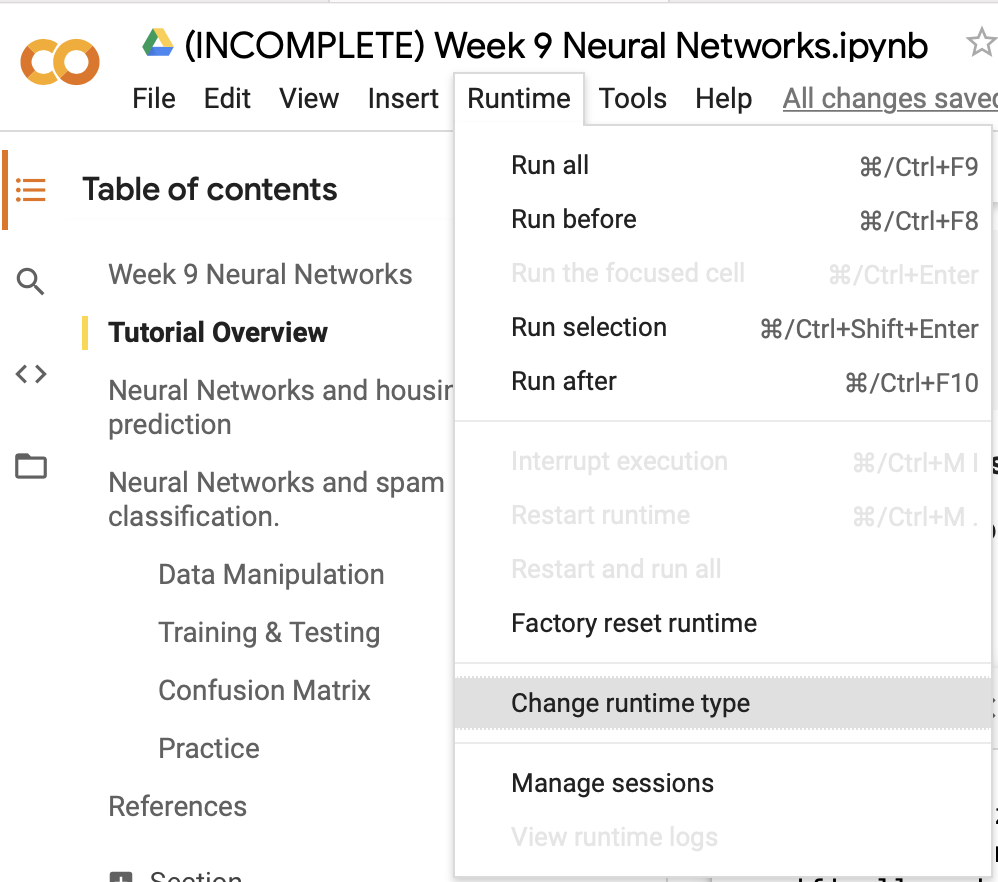



From there, select GPU from the dropdown menu:


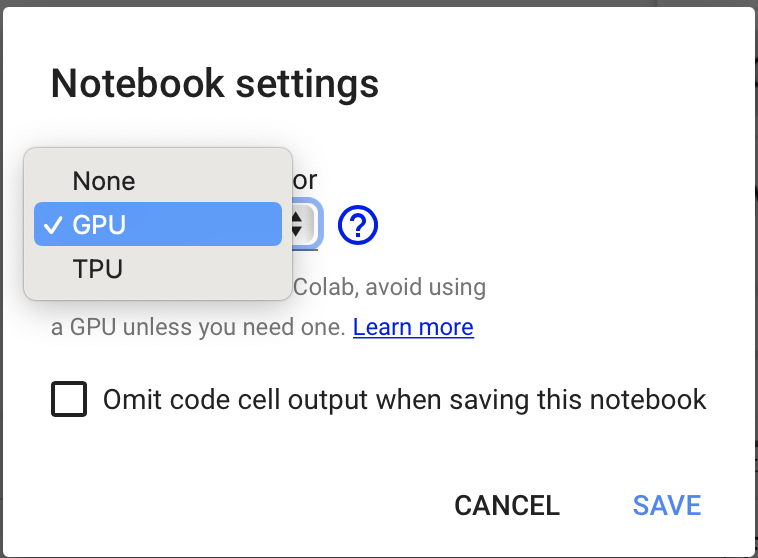

Once you get to the later part of the session, try switching back to the None option to see what the hit in performance looks like!

In case you have your own GPU, make sure to have your drivers updated and the latest CUDA version compatible with your GPU model. 

# Neural Networks and housing price prediction

Once again, we will use Pytorch for working with neural networks. Please check the last session for instructions on how to install Pytorch and check the installation by running th following cell.

In [24]:
import torch

Next, we'll need to create the neural network model. We went over the basics on the previous week session, but let's give a quick recap.

Pytorch gives many tools to create neural networks, but as the most basic you need to create a class that hereditates from the Module class. 
```
from torch import nn
class MyNeuralNet(nn.Module):
```

Next, we need to add the layers and instructions on how to operate the model. For a nn.Module subclass we need to define at least two methods: the innit and forward methods. 

This will define how to initialize your model structure and how to operate it respectively.  For the layers we will use the Linear layers that we introduced last week. There are more types of layers, but those are more task specific and we will cover them when they become relevant.


```
class MyNeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(MyNeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x
```

The first thing we need is data. For this we'll use an online house pricing CSV.

The goal here is to take the features of a house such as frontage, area, etc., and predict the house price using a neural network!

In [2]:
import numpy as np
import pandas as pd

In [4]:
# Learn more about the data:
# https://www.kaggle.com/alphaepsilon/housing-prices-dataset/data
# https://www.kaggle.com/apapiu/regularized-linear-models/notebook

df_original = pd.read_csv("https://8f6d2fcd-040e-4178-9dc7-915c7336186b.usrfiles.com/ugd/8f6d2f_34e52fa53c884daf816bf36a3a7f81a8.csv")
df_original#.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Now we need to use some of the material on data manipulation tha we covered before. For now let's remove any non-numerical data or data that could be difficult to interpret numerically.

> Note: We could use some encoding processing to replace some data like the zoning or utilities. We won't use it but if you are interested you could use some function like the sklearn LabelEncoder. 



In [10]:
# Create a copy so you don't have to reload the data each time it's changed
df = df_original.copy()

# Remove text columns
numeric_features = df.dtypes[df.dtypes != "object"].index
df = df[numeric_features]

# Remove ID column (It is numeric, but has no bearing on house price)
df.drop('Id', axis=1, inplace=True)

# Drop any rows with NAN values
df.dropna(inplace=True)

df#.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


We need to separate the inputs from the output, which is what we're trying to predict. It would be pretty easy for a neural network to guess the output if it was one of the inputs!

In [18]:
x = df.drop('SalePrice', 1).values
y = df['SalePrice'].values.reshape(-1, 1)

Ensure that none of the values are NAN

In [19]:
np.isnan(x).any()

False

In [20]:
np.isnan(y).any()

False

Split the data into the training and validation sets

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True)

Let's scale the data using sklearn's StandardScaler, which sets mean of a feature to 0 and it's variance to 1.

This makes features easier to interpret to a neural network, and also ensures no feature has greater bearing over another. For example, OverallCond ranges from 1-10, whereas other features like LotArea ranges in the thousands, so without standardizing, OverallCond could be 'drowned out' by such large values in these other features.

In [48]:
from sklearn.preprocessing import StandardScaler
# Scale x & y
scaler_x = StandardScaler()
scaler_x.fit(x_train)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)

scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

We transform our arrays to tensors so they can be operated with the Pytorch data structures.

In [49]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()
x_test  = torch.from_numpy(x_test).float()
y_test  = torch.from_numpy(y_test).float()

Now, for the amount of data that we have this is ok. But if our dataset where too heavy to load or operate, we would need to use a dataloader. This are special iterators that allow us to load and operate the data in small batches. 

Next, we need to create a model. Below is a very simple model that you can train and see its performance.

In [67]:
from torch import nn
import torch.nn.functional as F

device = "cpu"#"cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class MyNeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(MyNeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 20)
        self.layer3 = nn.Linear(20, 1)
        
    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = self.layer3(x)
        return x

model = MyNeuralNet(x_train.shape[1])

Using cpu device


Now we need to define a training loop for our model. Also we need a loss function and an optimizer.

In [71]:
import tqdm

loss_fn = F.mse_loss
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 1000

train_loss = np.zeros((epochs,))
test_loss = np.zeros((epochs,))

best_loss = 1000

for epoch in tqdm.trange(epochs):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    train_loss[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(x_test)
        val_loss = loss_fn(y_pred, y_test)
        test_loss[epoch] = val_loss.item()
        if val_loss < best_loss:
            best_loss = val_loss
            best_pred = model(x_test).numpy()

100%|██████████| 1000/1000 [00:01<00:00, 670.40it/s]


An important aspect of training neural networks is considering the training and validation (or test) loss. The best way to see these are to plot them using Matplotlib. For reasons we'll explain later, try to minimize the test error. Ideally, the train and testing error should be as close to each other as possible, and as small as possible.

There is a problem with the above network. By using the plot below, diagnose the issue!

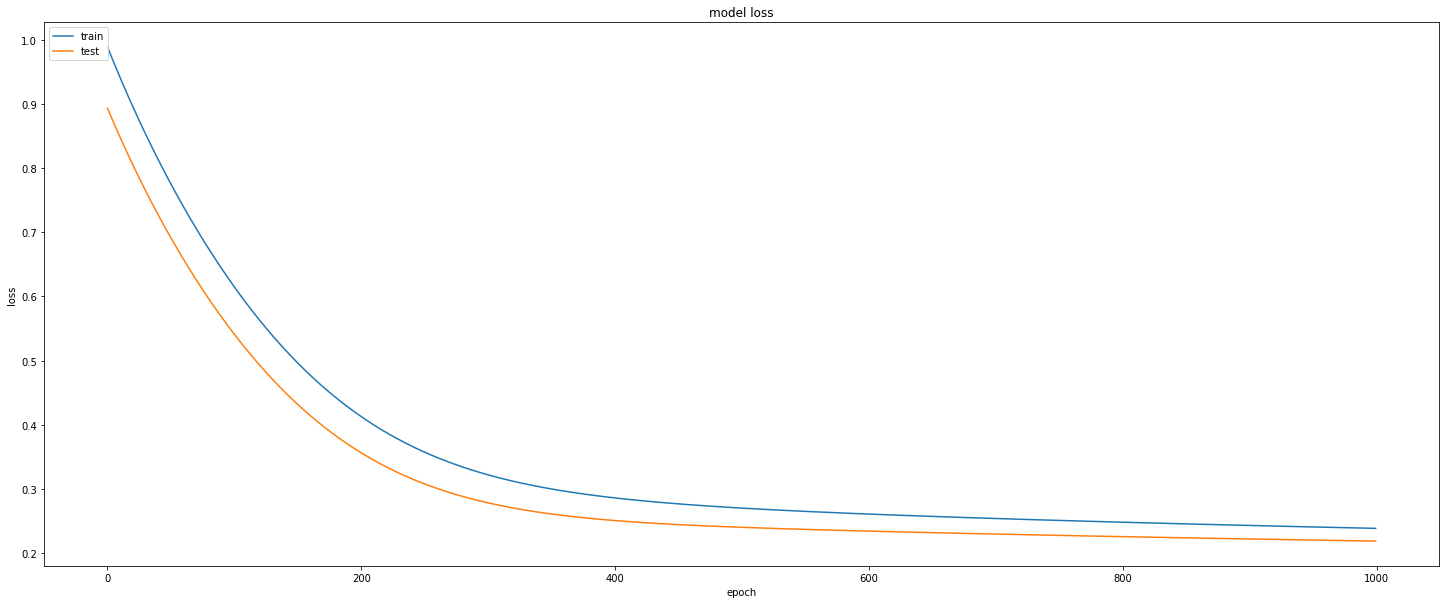

In [69]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Now that we have a model trained, we can use it to predict our test dataset and compare to the actual! This demonstrates how well it would perform if we were to deploy the network and use it to predict unseen, unlabelled data (except this data is labelled, so we assess the quality of the prediction).

In [79]:
# Predict the test set and invert the scaling on each
y_pred = model(x_test)
inversed_y_pred = scaler_y.inverse_transform(y_pred.detach().numpy())
inversed_y = scaler_y.inverse_transform(y_test)

# Show average price difference between predicted and actual
average_difference = inversed_y_pred-inversed_y
average_difference = sum([abs(d[0]) for d in average_difference])/len(average_difference)
print("Average difference between actual & prediction is {0}".format(int(average_difference)))

# Show some differences in price between predicted and actual
for i in range(10):
  print('Predicted {0}, actual is {1}'.format(int(inversed_y_pred[i][0]), int(inversed_y[i][0])))


Average difference between actual & prediction is 25015
Predicted 87724, actual is 117500
Predicted 254598, actual is 287090
Predicted 105232, actual is 110000
Predicted 74709, actual is 74999
Predicted 110913, actual is 99500
Predicted 79706, actual is 95000
Predicted 155964, actual is 137500
Predicted 241333, actual is 235000
Predicted 108054, actual is 139000
Predicted 297622, actual is 290000


We can also make a comparison on the labels to see how the predictions relate to them.

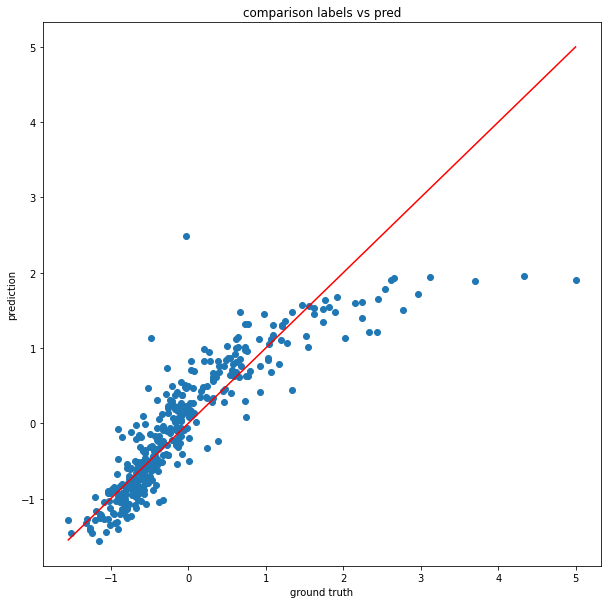

In [81]:
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(y_test, best_pred)
ref = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(ref, ref, 'r')
plt.title('comparison labels vs pred')
plt.ylabel('prediction')
plt.xlabel('ground truth')
plt.show()

Now it's your turn to experiment! Mess with the parameters and see if you can build a model which performs better than the above! (Try to bring loss and average actual/prediction difference down!). You do that mainly by changing the number of nodes in the first two Dense layers, and by changing the number of epochs, but if you're feeling adventurous you can learn about what Dropout layers do online and try to utilize them! (Don't stress though, we'll cover them in more detail later anyway)

# Neural Networks and spam email classification.

No one likes spam! That is why this lesson will be focused on classifying article titles as legitimate (real) or as spam (fake).

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# uncomment this line in google colab
#from google.colab import drive
import os

## Data Manipulation

First we load the data.

In [82]:
from urllib import request

data = request.urlopen('https://8f6d2fcd-040e-4178-9dc7-915c7336186b.usrfiles.com/ugd/8f6d2f_bd380dc659a8435da14304f221298114.txt')
fake = data.read().decode('utf-8').split('\n')

data = request.urlopen('https://8f6d2fcd-040e-4178-9dc7-915c7336186b.usrfiles.com/ugd/8f6d2f_8859880dfaf44f5c837f2e2c7b485b6e.txt')
real = data.read().decode('utf-8').split('\n')

print (f'Num Real: {len(real)} | Num Fake: {len(fake)} | Total: {len(real) + len(fake)}')

Num Real: 1969 | Num Fake: 1299 | Total: 3268


Now we can check out a few random real and fake titles!

In [83]:
import random as r

print('Real:')
for i in range(5): print(f'    - {real[r.randint(0, len(real)-1)]}')

print('Fake:')
for i in range(5): print(f'    - {fake[r.randint(0, len(fake)-1)]}')

Real:
    - trump jr i probably wouldve done things a little
    - trump policies may be boosting numbers at north coast uni
    - is donald trumps press secretary sean spicer on the way out
    - donald trump issues ultimatum over obamacare repeal
    - un general assembly what to watch in trump first attendance
Fake:
    - anoymous the world war 3 will surely happen 29 10 2016 donald trump will win
    - urgent donald trump just called out obama for his sickest crime yet liberty writers news
    - mind blowing live facebook poll comments show trump winning 95 90k comments this is proof we need if election is rigged
    - john pilger inside the invisible government war propaganda clinton and trump
    - comment on it is happening again america voting machines are switching votes from donald trump to hillary clinton by donaldbreaux


This data is text, and so to be useful, we must find a way to represent it numerically. Sklearn's CountVectorizer is perfect for this purpose: It creates a list of all the words in all the emails and then counts the number of each word in each email. These counts are the inputs (features) to the network.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

# Count the number of each word in each title
vectorizer = CountVectorizer()
data = vectorizer.fit_transform(fake + real).toarray()
print(data.shape)

# 0 = fake,  1 = real
# Create labels array
labels = np.zeros(len(fake) + len(real))

# Make real article labels 1
labels[len(fake):] = 1

(3268, 5799)


As always, we must shuffle and split the emails into training and validation data (80% training, 20% validation).

In [85]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [158]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, y = shuffle(data, labels)
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [160]:
from sklearn.preprocessing import StandardScaler
# Scale x & y
scaler_x = StandardScaler()
scaler_x.fit(x_train)
x_train = scaler_x.transform(x_train)
x_val = scaler_x.transform(x_val)

In [161]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()
x_val  = torch.from_numpy(x_val).float()
y_val  = torch.from_numpy(y_val).float()

## Training & Testing

First, we build and compile the model.

In [162]:
from torch import nn
import torch.nn.functional as F

device = "cpu"#"cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class SpamDetector(nn.Module):
    def __init__(self, input_dim):
        super(SpamDetector, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 100),
            nn.Tanh(),
            nn.Linear(100, 50),
            nn.Tanh(),
            nn.Linear(50, 10),
            nn.Tanh(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.layers(x)
        return x

model = SpamDetector(x_train.shape[1])

Using cpu device


Now, we train the model.

In [164]:
import tqdm

model = SpamDetector(x_train.shape[1])

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 1000

train_loss = np.zeros((epochs,))
test_loss = np.zeros((epochs,))
train_accuracy = np.zeros((epochs,))
val_accuracy = np.zeros((epochs,))

best_loss = 1000

for epoch in tqdm.trange(epochs):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    train_loss[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    correct = ((y_pred > 0.5) == y_train).type(torch.FloatTensor)
    train_accuracy[epoch] = correct.mean()
    
    with torch.no_grad():
        y_pred = model(x_val)
        val_loss = loss_fn(y_pred, y_val)
        test_loss[epoch] = val_loss.item()
        correct = ((y_pred > 0.5) == y_val).type(torch.FloatTensor)
        val_accuracy[epoch] = correct.mean()
        if val_loss < best_loss:
            best_loss = val_loss
            best_pred = model(x_val).numpy()

100%|██████████| 1000/1000 [00:44<00:00, 22.41it/s]


Plot loss across epochs:

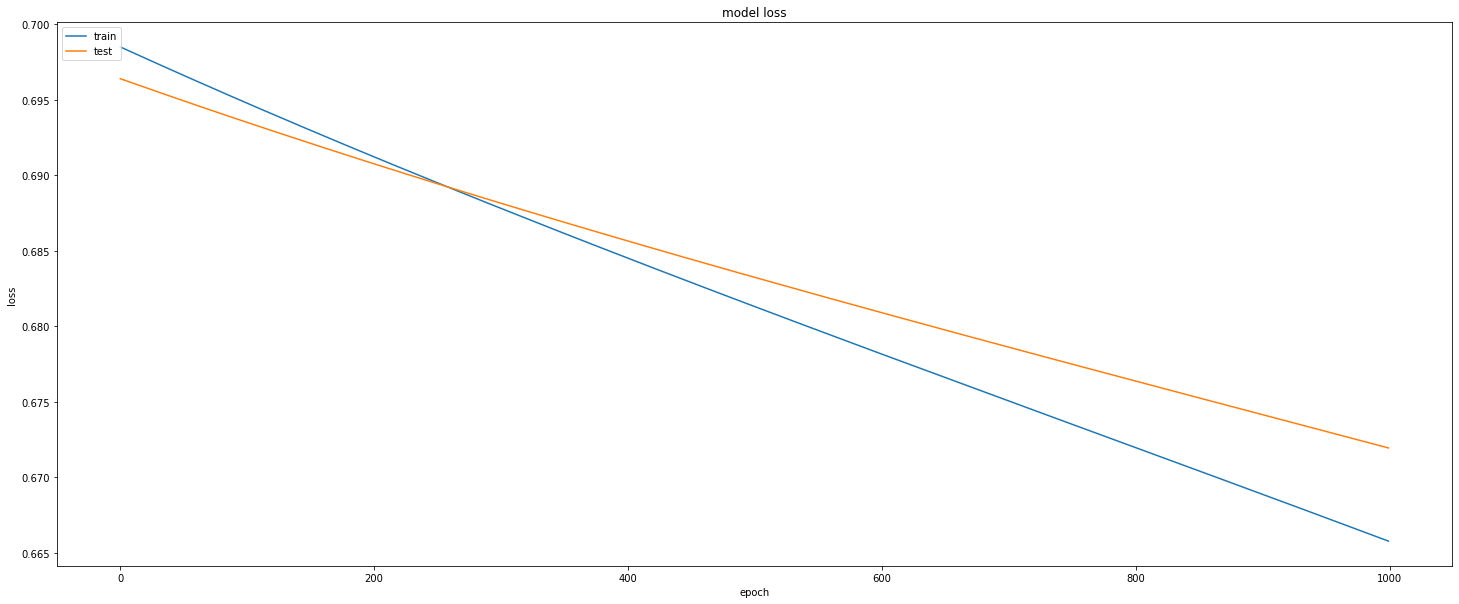

In [165]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot accuracy across epochs:

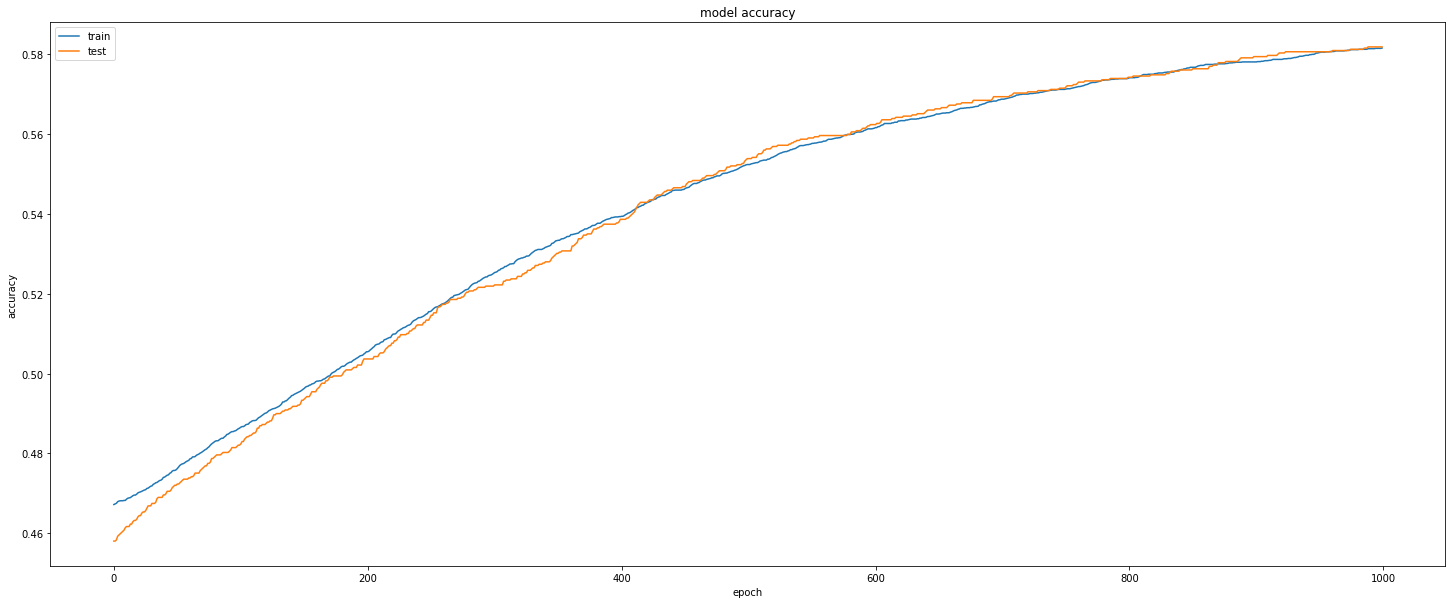

In [166]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As a general note, while validation accuracy is really what you're trying to maximize, it's usually loss that tells you 'what is going on' with your model (e.g. overfitting, underfitting, needs more training, or is performing well!)

## Confusion Matrix

This is a confusion matrix of the true positives, false positives, true negatives, and false negatives.

True denotes a correct prediction and false an incorrect prediction.

Positive denotes an email being legitimate, and false a spam email.

This helps you understand how your model may be failing you. For some purposes, such as this, it's very useful to know whether the model is getting more false positives or false negatives. For example, here a false positive (an email which isn't spam but is marked as such) is very harmful since the user may not see that email if put in the junk folder! Whereas if a few spam email make it through this filter (false negatives), it isn't the end of the world.

(654,) torch.Size([654])


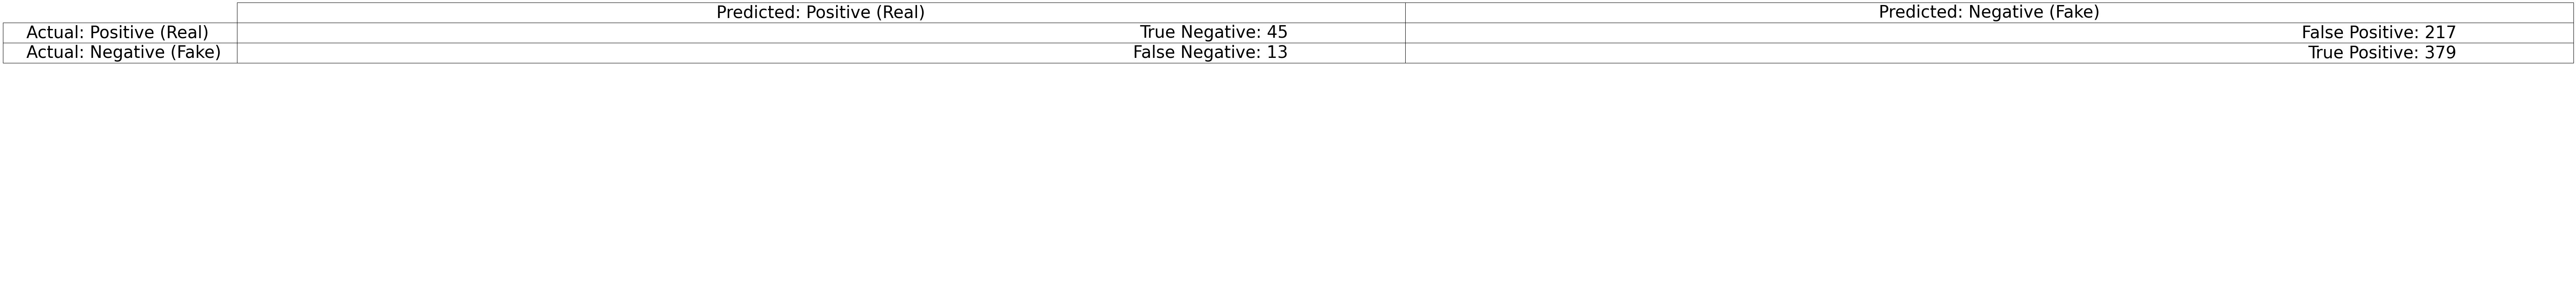

In [167]:
# Get predicted outputs for validation data
y_pred = best_pred.squeeze()

print(((y_pred > 0.5)*1).shape, y_val.shape)

# Check whether the prediction is correct
correct = ((y_pred > 0.5) == y_val.numpy())*1

#print((y_pred > 0.5)*1 == y_val)
#print(correct)

# Calculate true positives, true negatives, false positives, and false negatives
true_positive = len([i for count, i in enumerate(correct) if i == 1 and y_val[count] == 1])
true_negative = len([i for count, i in enumerate(correct) if i == 1 and y_val[count] == 0])
false_positive = len([i for count, i in enumerate(correct) if i == 0 and y_val[count] == 0])
false_negative = len([i for count, i in enumerate(correct) if i == 0 and y_val[count] == 1])

cell_text = [['True Negative: ' + str(true_negative), 'False Positive: ' + str(false_positive)],
             ['False Negative: ' + str(false_negative), 'True Positive: ' + str(true_positive)]]


columns = ('Predicted: Positive (Real)', 'Predicted: Negative (Fake)')
rows = ['Actual: Positive (Real)', 'Actual: Negative (Fake)']
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='top')
table.set_fontsize(40)
table.scale(4, 4)

We can also use sklearn to generate the confusion matrix

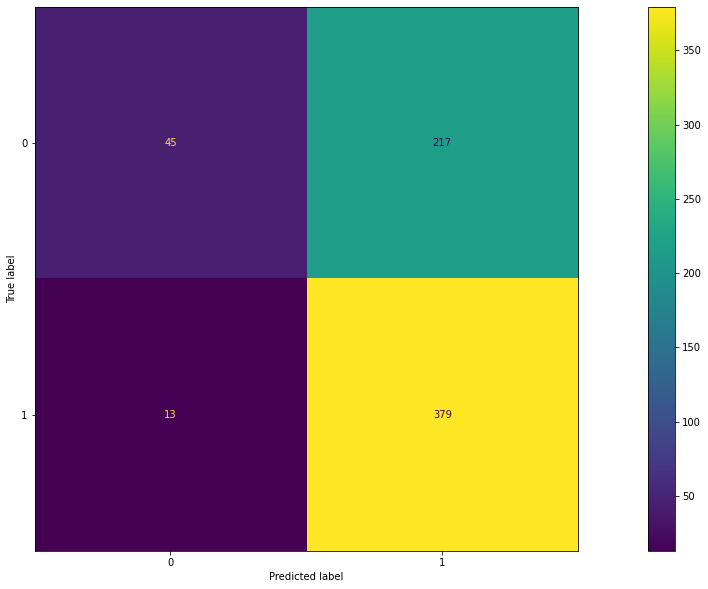

In [168]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, (y_pred > 0.5)*1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Practice
Below is our code to build and compile the model. There are three types of changes you should try out to see if you can achieve higher than 85%. Be sure to evaluate the model after each change to see how it affects the performance!

1. Play with the number of nodes in the Dense layers

2. Play with the number of epochs

3. Add Dropout layers anywhere after the first Dense layer (Note that you never have two sequential Dropout layers). The values are generally between 0.1 and 0.8, so do some experimentation! E.g.
```
nn.Dropout(p=0.5)
```
4. Try adding and removing Dense layers to the model (note that more layers does not equal better performance).

Check/plot the loss & accuracy between each of these steps to see whether the model is improving or not. It's smart to record your changes and the result such that you don't forget and have to test the same model again.

#References

Material adapted from the LearnAI 2020-2021 academic year cohort (University of Toronto AI Club)